<a href="https://colab.research.google.com/github/meenaljain0303/Handwriting-Classification-/blob/main/Handwriting_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [ ]:
data = np.load('/content/mnist_train_small.npy')

In [ ]:
X = data[:, 1:]
y = data[:, 0]

In [ ]:
X.shape, y.shape

((19999, 784), (19999,))

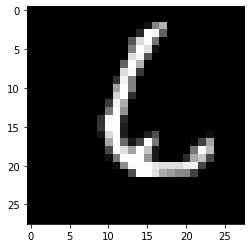

In [ ]:
plt.imshow(X[6].reshape(28,28), cmap="gray")

In [ ]:
y[6]

6

In [ ]:
train_test_split?

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((13399, 784), (13399,), (6600, 784), (6600,))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model=KNeighborsClassifier()

In [ ]:
#training the model happens
#plotting the points on the graph simply
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
model.predict(X_test[:10])

array([1, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

In [ ]:
y_test[:10] 

array([7, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

In [ ]:
#accuracy
model.score(X_test[:100], y_test[:100])

0.95

# Custom KNN


In [ ]:
class CustomKNN:
    # constructor
    def __init__(self, n_neighbours=5):
        self.n_neighbours = n_neighbours
        
    # training function
    def fit(self, X, y):
        self._X = (X - X.mean()) / X.std() # standardisation
        self._y = y
    
    # predict point
    # given a single point, tell me which class it belongs to 
    def predict_point(self, point):
        # storing the dis of given 'point' from each point in training data
        list_dist = []
        
        # these points are from my training data
        for x_point, y_point in zip(self._X, self._y):
            dist_point = ((point - x_point) ** 2).sum()
            list_dist.append([dist_point, y_point])
        
        ## sorting the list according to the distance
        sorted_dist = sorted(list_dist)
        top_k = sorted_dist[:self.n_neighbours]
        
        # taking the count 
        items, counts = np.unique(np.array(top_k)[:, 1], return_counts=True)
        ans = items[np.argmax(counts)]
        return ans
            
    # predict
    # give me answer for each number in the array
    def predict(self, X):
        results = []
        X = (X - X.mean()) / X.std() 
        for point in X:
            results.append(self.predict_point(point))
        return np.array(results, dtype=int)
    
    # score to measure my accuracy
    def score(self, X, y):
        return sum(self.predict(X) == y) / len(y)

In [ ]:
m2=CustomKNN()

In [ ]:
m2.fit(X_train, y_train)

In [ ]:
m2.predict(X_test[:10])

array([1, 7, 0, 9, 4, 5, 4, 6, 9, 2])

In [ ]:
y_test[:10]

array([7, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

In [ ]:
m2.score(X_test[:100], y_test[:100])

0.95

# New Section

In [ ]:
li = [ 
    [23, 0],
    [45, 1],
    [19, 0],
    [3, 2],
    [10, 0],
    [34, 2],
    [100, 1]
]

In [ ]:
sorted_list=sorted(li)

In [ ]:
top_k=sorted_list[:5]

In [ ]:
top_k

[[3, 2], [10, 0], [19, 0], [23, 0], [34, 2]]

In [ ]:
li, counts = np.unique(np.array(top_k)[:, 1], return_counts=True)

In [ ]:
li, counts

(array([0, 2]), array([3, 2]))